In [1]:
import numpy as np
import librosa
from matplotlib import pyplot as plt
import scipy.ndimage
import IPython.display as display

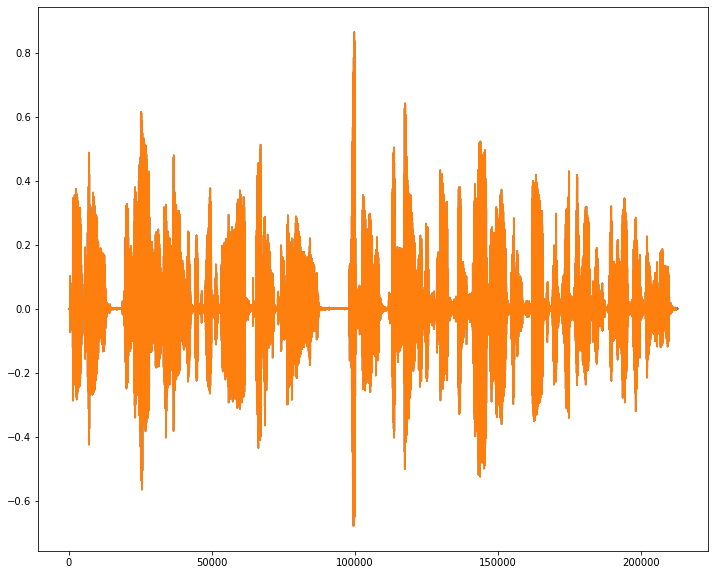

In [2]:
audio, rate = librosa.load('./LJ001-0001.wav')


stft = librosa.core.stft(audio)
spectrogram = np.abs(stft)
phase = np.angle(stft)

restored_audio = librosa.core.istft(spectrogram * np.exp(1j * phase))

plt.figure(figsize=(12,10))
plt.plot(audio)
plt.plot(restored_audio)

In [3]:
display.Audio(np.real(librosa.istft(spectrogram)), rate=rate)

In [4]:
def griffin_lim(spectrogram, n):
    spectrogram_tmp = spectrogram.copy()
    for i in range(n):
        # X_t+1 = F(F^(-X_t))
        spectrogram_tmp = librosa.stft(librosa.istft(spectrogram_tmp))

        denominator = np.where(np.abs(spectrogram_tmp) > 0.0001, np.abs(spectrogram_tmp), 0.0001)
        spectrogram_tmp = (spectrogram_tmp / denominator) * spectrogram
    return spectrogram_tmp

In [5]:
griffin_spectrogram = griffin_lim(spectrogram, 100)

griffin_limmed = np.real(librosa.istft(griffin_spectrogram))
display.Audio(griffin_limmed, rate=rate)